In [13]:
import * from utils
_SQRT2 = np.sqrt(2.0)
_SQRT3 = np.sqrt(3.0)

npoints = 1000
sigs = [0, 1, 2, 3, 4, 5, 6,7,8,9,10]
num_peaks_all = {}
cs = np.array(['w','g','r','c','m','y','b','k',])[:, np.newaxis].repeat(5,1).T.flatten()

numbins = 50
bins = np.linspace(0,2*np.pi, numbins+1)
numangsint = 51
numangsint_1 = numangsint-1
mid = int((numangsint_1)/2)
indstemp1 = np.zeros((numangsint_1,numangsint_1), dtype=int)
indstemp1[indstemp1==0] = np.arange((numangsint_1)**2)
indstemp1temp = indstemp1.copy()
for rat_name, mod_name, sess_name, day_name in (('R', '1', 'OF', 'day1'),
                                            ('R', '2', 'OF', 'day1'),
                                            ('R', '3', 'OF', 'day1'),
                                            ('R', '1', 'WW', 'day1'),
                                            ('R', '2', 'WW', 'day1'),
                                            ('R', '3', 'WW', 'day1'),
                                            ('R', '1', 'OF', 'day2'),
                                            ('R', '2', 'OF', 'day2'),
                                            ('R', '3', 'OF', 'day2'),
                                            ('R', '1', 'REM', 'day2'),
                                            ('R', '2', 'REM', 'day2'),
                                            ('R', '3', 'REM', 'day2'),
                                            ('R', '2', 'SWS', 'day2'),
                                            ('R', '3', 'SWS', 'day2'),
                                            ('Q', '1', 'OF', ''),
                                            ('Q', '2', 'OF', ''),
                                            ('Q', '1', 'WW', ''),
                                            ('Q', '2', 'WW', ''),
                                            ('Q', '1', 'REM', ''),
                                            ('Q', '2', 'REM', ''),
                                            ('Q', '1', 'SWS', ''),
                                            ('Q', '2', 'SWS', ''),
                                            ('S', '1', 'OF', ''),
                                            ('S', '1', 'WW', ''),
                                            ):
        
    file_name = rat_name + '_' + mod_name + '_' + sess_name + '_OF'
    if len(day_name)>0:
        file_name += '_' + day_name
    
    f = np.load('Toroidal_topology_grid_cell_data/Results/' + file_name + '_toroidal_rate_maps.npz', allow_pickle = True)
    mtots = f['mtots']
    f.close()
    num_neurons = np.shape(mtots)[0]

    num_peaks = np.zeros((num_neurons, len(sigs)))
    for nn in np.arange(num_neurons):
        mtemp1_3 = mtots[nn,:,:].copy()
        for j in range(numangsint_1):
            mtemp1_3[j,:] = np.roll(mtemp1_3[j,:],int(j/2))
        mtemp1_4 = np.concatenate((mtemp1_3, mtemp1_3, mtemp1_3),1)
        mtemp1_5 = np.zeros_like(mtemp1_4)
        mtemp1_5[:, :mid] = mtemp1_4[:, (numangsint_1)*3-mid:]  
        mtemp1_5[:, mid:] = mtemp1_4[:,:(numangsint_1)*3-mid]  
        mtot = np.concatenate((mtemp1_5,mtemp1_4,mtemp1_5))
        for s, sig in enumerate(sigs):
            data = gaussian_filter(mtot, sigma = sig, mode = 'constant')
            datatmp = data.copy().flatten()
            datatmpBU = datatmp.copy()
            datainds = np.indices(np.shape(data)).flatten().reshape((2,data.shape[0]**2)).T
            datacount = np.zeros(len(datatmp))
            XY = np.zeros((npoints,2))
            for k in range(npoints):
                ktemp = np.argmax(datatmp)
                XY[k,:] = datainds[ktemp,:]
                datacount[ktemp] += 1
                datatmp[ktemp] = datatmpBU[ktemp]/datacount[ktemp]

            X = squareform(pdist(XY, 'euclidean'))
            thresh = 5
            X[X>thresh] = -1
            knn_indices = []
            knn_dists  =[]
            F = np.zeros(npoints)
            for i in range(npoints):
                indsvals = np.where(X[i,:]>=0)[0]
                knn_indices.append(indsvals)
                knn_dists.append(X[i,indsvals])
                F[i] = np.sum(np.exp(knn_dists[i]))
            i = np.argmax(F)
            inds_all = np.arange(len(XY[:,0]))
            classes = np.zeros(len(XY[:,0]))
            classcurr = 1
            inds_left = inds_all>-1
            inds_left[i] = False
#            inds_left[knn_indices[i]] = False
            classes[i] = classcurr
            classes[knn_indices[i]] = classcurr
            for j in range(npoints-1):
                F[knn_indices[i]] -= knn_dists[i]
                Fmax = np.argmax(F[inds_left])
                i = inds_all[inds_left][Fmax]
                inds_left[i] = False
#                inds_left[knn_indices[i]] = False
                if classes[i] == 0:
                    classcurr += 1
                    classes[i] = classcurr
                    classes[knn_indices[i]] = classcurr
                else:
                    classes[knn_indices[i]] = classes[i]
            ind = classes.astype(int) -1
            binstacked = np.bincount(ind)
            indd = np.unique(ind)
                        
            inds1 = ((XY[:,0]>=numangsint_1) & 
                    (XY[:,0]<2*numangsint_1) & 
                    (XY[:,1]>=numangsint_1) & 
                    (XY[:,1]<2*numangsint_1))

            inds2 = ((XY[:,0]>=1/2*numangsint_1) & 
                    (XY[:,0]<3/2*numangsint_1) & 
                    (XY[:,1]>=numangsint_1) & 
                    (XY[:,1]<2*numangsint_1))

            inds3 = ((XY[:,0]>=3/2*numangsint_1) & 
                    (XY[:,0]<5/2*numangsint_1) & 
                    (XY[:,1]>=numangsint_1) & 
                    (XY[:,1]<2*numangsint_1))

            inds4 = ((XY[:,0]>=numangsint_1) & 
                    (XY[:,0]<2*numangsint_1) & 
                    (XY[:,1]>=1/2*numangsint_1) & 
                    (XY[:,1]<3/2*numangsint_1))

            inds5 = ((XY[:,0]>=numangsint_1) & 
                    (XY[:,0]<2*numangsint_1) & 
                    (XY[:,1]>=3/2*numangsint_1) & 
                    (XY[:,1]<5/2*numangsint_1))
            nump = []
            for inds in [inds1,inds2,inds3,inds4,inds5]:
                bintemp = np.zeros(max(ind)+1)
                ind1 = ind[inds]
                inddd = np.unique(ind1)
                bintemp[inddd] = np.bincount(ind1)[inddd]
                indsfinal = np.where(np.divide(bintemp, binstacked)>0.5)[0]
                nump.append(len(np.unique(indsfinal)))
            
            num_peaks[nn, s] = np.max(nump)
    num_peaks_all[rat_name + '_' + mod_name + '_' + sess_name] = num_peaks
    

C:\Users\erihe\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in true_divide


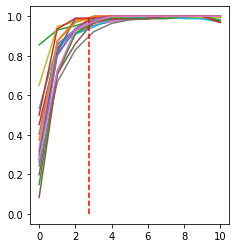

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
sigs = [0, 1, 2, 3, 4, 5, 6,7,8,9,10]
for k in num_peaks_all:  
    num_peaks = num_peaks_all[k].copy()
    num_neurons = np.shape(num_peaks)[0]
    ax1.plot(sigs, np.sum(num_peaks[:,:]==1,0)/num_neurons)
ax1.set_aspect(1.0/ax1.get_data_ratio())
plt.plot([2.75, 2.75], [0,1], c = 'r', ls = '--')


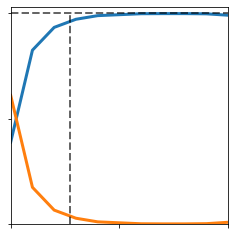

In [36]:
numneurs = np.zeros((len(sigs), 3))
for k in num_peaks_all:    
    num_peaks = np.array(num_peaks_all[k]).copy()
    for i in sigs:
        numneurs[i,0] += np.sum(num_peaks[:,i]==0)
        numneurs[i,1] += np.sum(num_peaks[:,i]==1)
        numneurs[i,2] += np.sum(num_peaks[:,i]>1)

plt.figure()
ax = plt.axes()
ax.plot(numneurs[:,1:]/np.sum(numneurs[0,:]), lw = 3)
ax.set_xlim([0,10])
ax.set_ylim([0,1.03])

ax.set_xticks([0,5,10])
ax.set_xticklabels(['','', ''])
ax.set_yticks([0,0.5,1.0])
ax.set_yticklabels(['','',''])
ax.set_aspect(1.0/ax.get_data_ratio())

ax.plot([0,10], [1,1], c = 'k', ls = '--', lw = 2, alpha = 0.6)
plt.plot([2.75, 2.75], [0,1], c = 'k', ls = '--', lw = 2, alpha = 0.6)
